In [1]:
import matplotlib.pyplot as plt
import tarfile
import os
import numpy as np
from skimage.measure import label, regionprops
from skimage import io

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


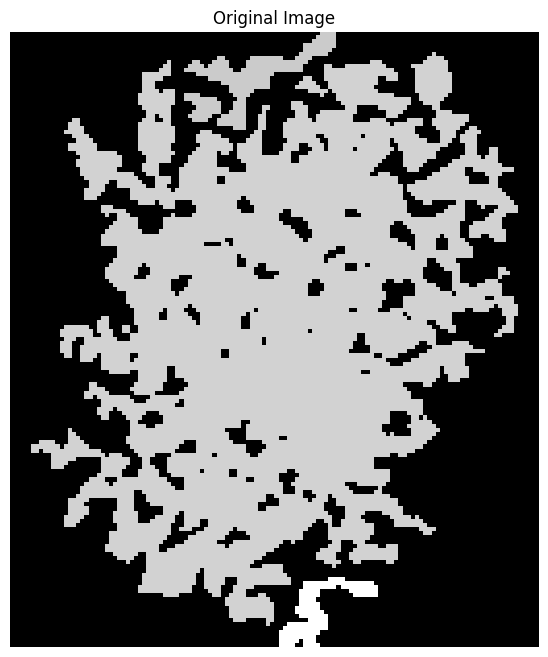

In [4]:
def visualize_image_processing(image_path, margin=5, min_size=100, top_n=2):
    img = io.imread(image_path)
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'  # Update this path
visualize_image_processing(image_path)

#Pixel Values

## Global Function

1. The result of processing each patch is appended to the results list, which eventually contains the processed data for all 5x5 patches in the image.
2. Global function using image patch size of 5 × 5 pixels

In [21]:
import numpy as np
from imageio import imread

def xGlob(image_path):
    # Load the image
    img = imread(image_path)

    # Ensure the image is in grayscale; if it's not, convert or assert an error
    if img.ndim == 3:
        raise ValueError("Image must be grayscale. Currently, it has multiple channels.")

    def process_patch(patch):
        return np.mean(patch)

    results = []
    for i in range(0, img.shape[0] - 4):
        for j in range(0, img.shape[1] - 4):
            # Extract a 5x5 patch
            patch = img[i:i+5, j:j+5]
            # Process the patch (e.g., compute the mean)
            result = process_patch(patch)
            results.append(result)

    return results

# Use the function
image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
results = xGlob(image_path)
print(results)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 410.48, 820.96, 1436.68, 2257.64, 3283.84, 3899.56, 4515.28, 4720.52, 3899.56, 2873.36, 1847.16, 820.96, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 205.

<ipython-input-21-10dee2e3a85f>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(image_path)


## XSqr
1. Extract the pixel values in concentric squares from the center of the patch outwards
2.  Using an optional patch size (5x5 pixels)
3. The square values for the first 5 patches as a demonstration of what the processing reveals.

In [12]:
import numpy as np
from PIL import Image

def load_image(image_path):
    # Load the image and convert to grayscale
    image = Image.open(image_path)
    image = image.convert('L')
    return np.array(image)

def get_square_values(patch):
    # Extract values in concentric squares
    center = np.array(patch.shape) // 2
    max_radius = min(center)
    square_values = []

    for r in range(max_radius + 1):
        # Create the square mask
        mask = np.zeros_like(patch, dtype=bool)
        mask[max(center[0]-r, 0):min(center[0]+r+1, patch.shape[0]),
             max(center[1]-r, 0):min(center[1]+r+1, patch.shape[1])] = True
        mask[max(center[0]-(r-1), 0):min(center[0]+(r-1)+1, patch.shape[0]),
             max(center[1]-(r-1), 0):min(center[1]+(r-1)+1, patch.shape[1])] = False
        # Extract and sort values
        square_values.extend(np.sort(patch[mask]))

    return np.array(square_values)

def process_image_for_squares(image_array, patch_size=5):
    rows, cols = image_array.shape
    square_values_list = []

    # Iterate over each possible 5x5 patch in the image
    for i in range(0, rows - patch_size + 1):
        for j in range(0, cols - patch_size + 1):
            # Extract the patch
            patch = image_array[i:i+patch_size, j:j+patch_size]
            # Get the square values from the patch
            square_values = get_square_values(patch)
            square_values_list.append(square_values)

    return square_values_list

# Replace 'image_path' with your actual image path
image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
image = load_image(image_path)

# Process the image and get the square values for each patch
all_square_values = process_image_for_squares(image)

# For demonstration purposes, let's print the square values for the first 5 patches
for i, square_values in enumerate(all_square_values[:5]):
    print(f"Square Values for patch {i+1}:", square_values)




Square Values for patch 1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Square Values for patch 2: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Square Values for patch 3: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Square Values for patch 4: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Square Values for patch 5: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Circle

1. Takes a 5x5 pixel patch of the image as input and extracts values from concentric circles centered within the patch.
2. Calculates the center of the patch and iterates through radii from 0 to half the patch size, creating a mask for each circle using a distance formula from the center.
3. The Circle values for the first 5 patches as a demonstration of what the processing reveals.

In [16]:
import numpy as np
from PIL import Image

def load_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # convert to grayscale
    return np.array(image)

def get_circle_values(patch):
    center = np.array(patch.shape) // 2
    circle_values = []

    for r in range(patch.shape[0] // 2 + 1):
        # Create the circle mask
        Y, X = np.ogrid[:patch.shape[0], :patch.shape[1]]
        dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)
        mask = (dist_from_center >= r) & (dist_from_center < r + 1)
        # Extract and sort values
        circle_values.extend(np.sort(patch[mask]))

    return np.array(circle_values)

def process_image_for_circles(image_array, patch_size=5):

    rows, cols = image_array.shape
    circle_values_list = []

    # Iterate over each possible patch in the image
    for i in range(0, rows - patch_size + 1):
        for j in range(0, cols - patch_size + 1):
            # Extract the patch
            patch = image_array[i:i+patch_size, j:j+patch_size]
            # Get the circle values from the patch
            circle_values = get_circle_values(patch)
            circle_values_list.append(circle_values)

    return circle_values_list

# Replace 'image_path' with your actual image path
image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
image = load_image(image_path)

# Process the image and get the circle values for each patch
all_circle_values = process_image_for_circles(image)

# For demonstration purposes, let's print the circle values for the first 5 patches
for i, circle_values in enumerate(all_circle_values[:5]):
    print(f"Circle Values for patch {i+1}:", circle_values)


Circle Values for patch 1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Circle Values for patch 2: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Circle Values for patch 3: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Circle Values for patch 4: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Circle Values for patch 5: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Pixel Differences

## Angular difference

1. Involves assessing pixel differences in an angular pattern.
2. Diagonal or other angular orientations within the patch to capture the texture's directionality and angular variance.
3. Print Angular Results

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def calculate_angular_differences(patch):
    # Calculate differences in multiple directions
    horizontal_diffs = np.diff(patch, axis=1)[:-1, :]  # Horizontal differences, excluding last row for alignment
    vertical_diffs = np.diff(patch, axis=0)[:, :-1]  # Vertical differences, excluding last column for alignment
    diagonal_diffs = np.diff(patch.diagonal())  # Diagonal differences

    # Additional direction (e.g., anti-diagonal) for more angular variation
    anti_diagonal_diffs = np.diff(np.fliplr(patch).diagonal())

    # Combine all differences into a single descriptor vector
    descriptor = np.concatenate([
        horizontal_diffs.flatten(),
        vertical_diffs.flatten(),
        diagonal_diffs.flatten(),
        anti_diagonal_diffs.flatten()
    ])

    return descriptor

# Placeholder for image loading
image = io.imread('/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif')

# Simulating a 5x5 patch extraction for demonstration
patch = np.random.randint(0, 255, (5, 5))

# Compute the Angular Descriptor for the patch
angular_descriptor = calculate_angular_differences(patch)

print("Angular Descriptor:", angular_descriptor)


Angular Descriptor: [ -51  -67   46  -85 -114  126 -234   35   20 -146  228 -196 -130  203
  -13  -70   34  -29  164 -116 -112   22 -250  212    4 -146  203  -38
   52  167  -50 -127  -80 -124  190 -132  -31  -16    0  182]


## Radial Differences
1. Consider the distance of each pixel from the center of the patch (5x5).
2. Based on the differences in intensity values as a function of distance from this center pixel.
3. Calculate the radial descriptor by assessing the intensity values of pixels at increasing distances from the center.
4. Given the non-continuous nature of pixel locations and the square shape of the patch, this step involves grouping pixels by their rounded distance from the center and summarizing these groups' intensities, possibly by mean or sum.

In [19]:
import numpy as np
from skimage import io, img_as_float
from scipy.spatial.distance import cdist

def compute_radial_descriptor(patch):
    center = np.array([[2, 2]])  # Center of the patch
    coords = np.indices(dimensions=patch.shape).reshape(2, -1).T  # Coordinates of all pixels

    # Compute distances of all pixels from the center
    distances = cdist(coords, center, metric='euclidean').flatten()

    # Round distances to nearest half to group pixels radially
    rounded_distances = np.round(distances * 2) / 2

    # Compute the radial descriptor as the mean intensity for each radial distance
    radial_descriptor = {}
    for distance in np.unique(rounded_distances):
        mask = rounded_distances == distance
        radial_descriptor[distance] = np.mean(patch.flatten()[mask])

    return radial_descriptor


image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
image = img_as_float(io.imread(image_path, as_gray=True))

# Extract a 5x5 patch from the image (example: top-left corner)
patch = image[0:5, 0:5]

# Compute the Radial Descriptor for the patch
radial_descriptor = compute_radial_descriptor(patch)

print("Radial Descriptor:", radial_descriptor)


Radial Descriptor: {0.0: 0.0, 1.0: 0.0, 1.5: 0.0, 2.0: 0.0, 3.0: 0.0}
